In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as 

In [14]:


# Load CSVs
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Step 1: Convert timestamps
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date'] = trader_df['Timestamp IST'].dt.normalize()

# Step 2: Convert PnL to numeric
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')

# Step 3: Aggregate daily PnL
daily_pnl = trader_df.groupby('date')['Closed PnL'].sum().reset_index()
daily_pnl.rename(columns={'Closed PnL': 'Daily Closed PnL'}, inplace=True)

# Step 4: Merge with sentiment classification
merged_df = pd.merge(
    daily_pnl,
    sentiment_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

# Step 5: Group by sentiment and get descriptive stats
sentiment_pnl_stats = merged_df.groupby('classification')['Daily Closed PnL'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).sort_values(by='mean', ascending=False)

# Step 6: Display result
print("PnL Pattern by Market Sentiment:")
print(sentiment_pnl_stats)


PnL Pattern by Market Sentiment:
                count          mean        median            std  \
classification                                                     
Extreme Fear       14  52793.589178  22561.739636  101262.394065   
Fear               91  36891.818040   1412.314654   96611.848503   
Extreme Greed     114  23817.292199   3127.536297   72827.301581   
Neutral            67  19297.323516   1818.573295   37995.209071   
Greed             193  11140.566181    678.475928   62427.957949   

                          min            max  
classification                                
Extreme Fear    -76880.729036  269328.365917  
Fear           -122672.000883  616413.032233  
Extreme Greed  -127075.399585  599151.795008  
Neutral         -10116.875552  213860.675308  
Greed          -419020.225731  416876.888120  


C:\Users\Aniket Mandal\AppData\Local\Temp\ipykernel_20500\165346088.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='mean', data=sentiment_stats, ax=axes[0,0], palette="Greens_d")
C:\Users\Aniket Mandal\AppData\Local\Temp\ipykernel_20500\165346088.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='median', data=sentiment_stats, ax=axes[0,1], palette="Blues_d")
C:\Users\Aniket Mandal\AppData\Local\Temp\ipykernel_20500\165346088.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classifi

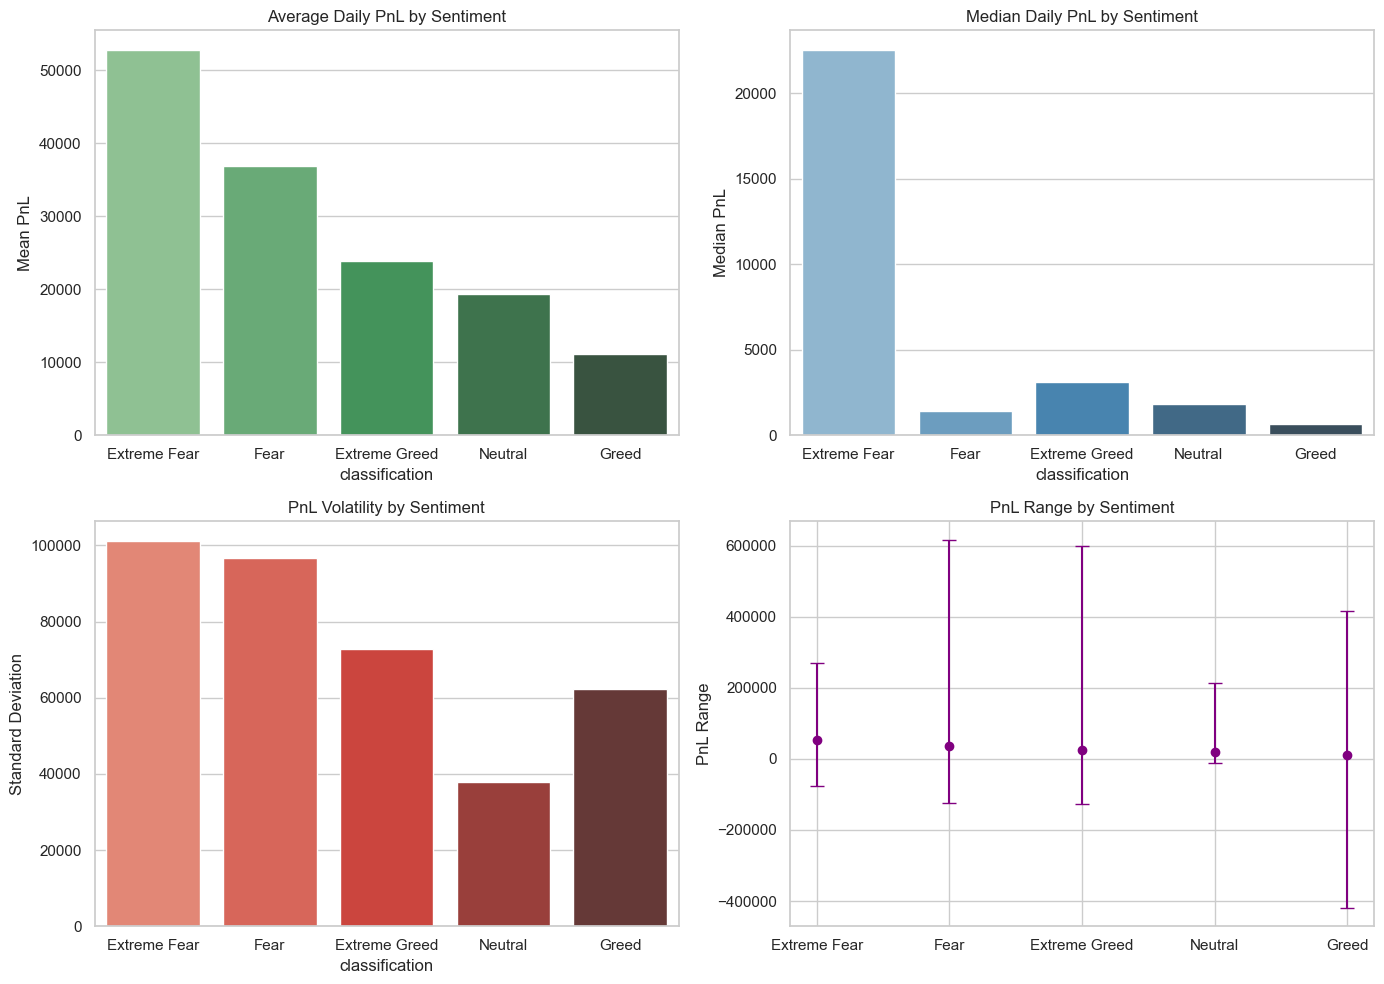

In [15]:
# Reseting index for plotting
sentiment_stats = sentiment_pnl_stats.reset_index()

sns.set(style='whitegrid')

# subplots
fig, axes = plt.subplots(2,2, figsize=(14,10))

# Average PnL
sns.barplot(x='classification', y='mean', data=sentiment_stats, ax=axes[0,0], palette="Greens_d")
axes[0,0].set_title('Average Daily PnL by Sentiment')
axes[0,0].set_ylabel("Mean PnL")

# Median PnL
sns.barplot(x='classification', y='median', data=sentiment_stats, ax=axes[0,1], palette="Blues_d")
axes[0,1].set_title('Median Daily PnL by Sentiment')
axes[0,1].set_ylabel('Median PnL')

# Std Deviation
sns.barplot(x='classification', y='std', data=sentiment_stats, ax=axes[1,0], palette='Reds_d')
axes[1,0].set_title('PnL Volatility by Sentiment')
axes[1,0].set_ylabel('Standard Deviation')

# PnL Range
axes[1, 1].errorbar(
    x=sentiment_stats['classification'],
    y=sentiment_stats['mean'],
    yerr=[
        sentiment_stats['mean'] - sentiment_stats['min'],
        sentiment_stats['max'] - sentiment_stats['mean']
    ],
    fmt='o',
    capsize=5,
    color='purple'
)
axes[1, 1].set_title('PnL Range by Sentiment')
axes[1, 1].set_ylabel('PnL Range')
axes[1, 1].set_xticks(range(len(sentiment_stats['classification'])))
axes[1, 1].set_xticklabels(sentiment_stats['classification'])

plt.tight_layout()
plt.show()

Key Patterns Detected
- Extreme Fear and Fear days have higher average and median PnL than Greed or Neutral days.

- Greed days show the lowest average and median PnL and highest loss volatility (worst min PnL).

- Fear seems to trigger smarter or more cautious trading, possibly leading to better results.

